# What is the most optimal skill to learn for Data Analysts?

### Methodology
1. Continue from last notebook to find percent of postings with skill
2. Visualize median salary vs percent skill demand
3. (Optional) Determine if certain technologies are more prevalent

___

## Importing Libraries and Data

In [73]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Filtering the Data to Data Analyst Jobs in the United States

In [74]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

## Cleaning the Data

In [75]:
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US_exploded = df_DA_US.explode('job_skills')

df_DA_US_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


## Calculating the Percent of Job Postings that Have Skills

In [76]:
#Grouping the data frame based on the median salary and the count
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills


,count,median
job_skills,,
sql,2508,91000.0
excel,1808,84392.0
python,1431,97500.0
tableau,1364,92875.0
sas,926,90000.0
...,...,...
theano,1,100000.0
typescript,1,65000.0
vmware,1,147500.0


In [77]:
# Renaming count and medain to be less confusing

df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

df_DA_skills

,skill_count,median_salary
job_skills,,
sql,2508,91000.0
excel,1808,84392.0
python,1431,97500.0
tableau,1364,92875.0
sas,926,90000.0
...,...,...
theano,1,100000.0
typescript,1,65000.0
vmware,1,147500.0


In [78]:
# Getting percentage by finding the len
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

# The lengeth of this will provide the number of job postings
DA_job_count = len(df_DA_US)  # Find count of Data Analyst jobs in US with salary info

df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

df_DA_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.0,57.655172
excel,1808,84392.0,41.563218
python,1431,97500.0,32.896552
tableau,1364,92875.0,31.356322
sas,926,90000.0,21.287356
...,...,...,...
theano,1,100000.0,0.022989
typescript,1,65000.0,0.022989
vmware,1,147500.0,0.022989


In [79]:
# Making a cut off percentage inorder to not plot all 170 rows
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DA_job_count = len(df_DA_US) 

df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

skill_percent = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]

df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


## Median Salary vs Percent Skill Demand

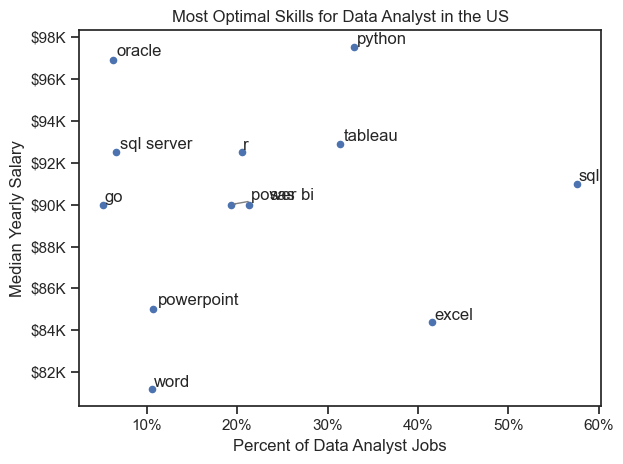

In [80]:
from adjustText import adjust_text

df_DA_skills_high_demand.plot(kind='scatter', x='skill_percent', y='median_salary')

# Preparing texts for aadjustText
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

from matplotlib.ticker import PercentFormatter
ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analyst in the US')

plt.tight_layout()
plt.show()

## Coloring by Technology

In [81]:
df_technology = df['job_type_skills'].copy()

# removing duplicates
df_technology = df_technology.drop_duplicates()

# removing NaN values
df_technology = df_technology.dropna()

# combining all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # converting string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# removing duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['msaccess',
  'visio',
  'spreadsheet',
  'ssis',
  'datarobot',
  'esquisse',
  'power bi',
  'sharepoint',
  'powerbi',
  'qlik',
  'looker',
  'sheets',
  'sas',
  'dax',
  'spss',
  'powerpoint',
  'microstrategy',
  'splunk',
  'nuix',
  'alteryx',
  'ssrs',
  'outlook',
  'sap',
  'word',
  'ms access',
  'tableau',
  'cognos',
  'excel'],
 'programming': ['c#',
  'dart',
  'haskell',
  't-sql',
  'fortran',
  'apl',
  'java',
  'solidity',
  'sass',
  'objective-c',
  'css',
  'elixir',
  'javascript',
  'python',
  'nosql',
  'sql',
  'go',
  'ruby',
  'golang',
  'f#',
  'matlab',
  'r',
  'mongo',
  'sas',
  'c',
  'html',
  'clojure',
  'ocaml',
  'lisp',
  'kotlin',
  'bash',
  'cobol',
  'rust',
  'assembly',
  'php',
  'pascal',
  'no-sql',
  'lua',
  'erlang',
  'crystal',
  'vb.net',
  'vba',
  'shell',
  'swift',
  'groovy',
  'perl',
  'visual basic',
  'julia',
  'c++',
  'delphi',
  'mongodb',
  'powershell',
  'typescript',
  'visualbasic',
  'sc

In [82]:
# Turning the dictionary into a dataframe
pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

,technology,skills
0,analyst_tools,"[msaccess, visio, spreadsheet, ssis, datarobot..."
1,programming,"[c#, dart, haskell, t-sql, fortran, apl, java,..."
2,cloud,"[snowflake, heroku, gcp, linode, aws, databric..."
3,libraries,"[ggplot2, mlpack, selenium, jupyter, nltk, sci..."
4,other,"[terraform, chef, puppet, atlassian, codecommi..."
5,databases,"[sqlserver, couchbase, firestore, firebase, el..."
6,os,"[suse, macos, arch, windows, redhat, wsl, debi..."
7,async,"[confluence, notion, trello, dingtalk, wimi, j..."
8,webframeworks,"[nuxt.js, asp.net, flask, asp.netcore, laravel..."
9,sync,"[microsoft teams, symphony, rocketchat, twilio..."


In [83]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

#Eploding out the skills 
df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,msaccess
0,analyst_tools,visio
0,analyst_tools,spreadsheet
0,analyst_tools,ssis
0,analyst_tools,datarobot
...,...,...
9,sync,unify
9,sync,slack
9,sync,ringcentral
9,sync,wire


In [84]:
# Merging df_DA_skills_high_demand and df_technology
df_plot = df_DA_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')

df_plot

,skill_count,median_salary,skill_percent,technology,skills
0,2508,91000.00,57.655172,programming,sql
1,1808,84392.00,41.563218,analyst_tools,excel
2,1431,97500.00,32.896552,programming,python
3,1364,92875.00,31.356322,analyst_tools,tableau
4,926,90000.00,21.287356,analyst_tools,sas
5,926,90000.00,21.287356,programming,sas
6,893,92500.00,20.528736,programming,r
7,838,90000.00,19.264368,analyst_tools,power bi
8,462,85000.00,10.620690,analyst_tools,powerpoint
9,461,81194.75,10.597701,analyst_tools,word


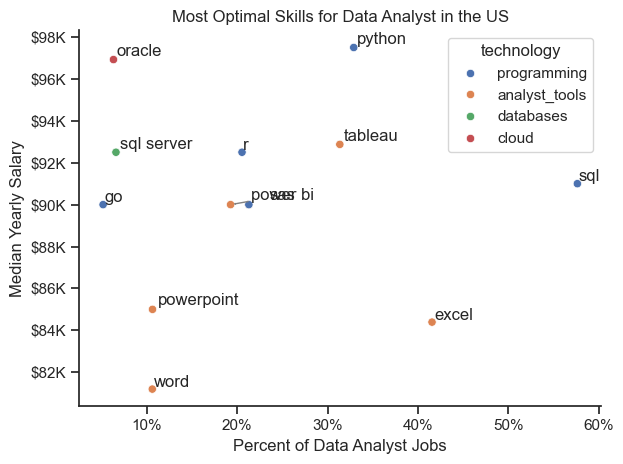

In [85]:
from adjustText import adjust_text

#df_plot.plot(kind='scatter', x='skill_percent', y='median_salary')
sns.scatterplot(
    data=df_plot,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')

# Preparing texts for aadjustText
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

from matplotlib.ticker import PercentFormatter
ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analyst in the US')

plt.tight_layout()
plt.show()